# Form Recognition in Spark-OCR fine-tuning

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-ocr-workshop/blob/master/jupyter/FormRecognition/colab/SparkOcrFormRecognitionFineTuning.ipynb)

Set license and AWS keys

In [ ]:
## Install spark-ocr python packge
Need to specify:
- secret
- license
- aws credentials

Option #1 - define in this cell

In [ ]:
secret = ""
license = ""
version = secret.split("-")[0]

import os
if license:
    os.environ['JSL_OCR_LICENSE'] = license

Option #2 - provide spark_ocr.json file

In [ ]:
import json, os
import sys

if 'google.colab' in sys.modules:
    from google.colab import files

    if 'spark_ocr.json' not in os.listdir():
      license_keys = files.upload()
      os.rename(list(license_keys.keys())[0], 'spark_ocr.json')

with open('spark_ocr.json') as f:
    license_keys = json.load(f)

# Defining license key-value pairs as local variables
locals().update(license_keys)

Saving spark_ocr.json to spark_ocr.json


## Install deps 

In [ ]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=0e9ed12b1d684e54cadb4d42cb5515fa220081f836809db3cc7e7e54d814953a
  Stored in directory: /tmp/pip-ephem-wheel-cache-2y8wkjz_/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
# downloading and unzipping the dataset
!rm -r ./llmv2_Alab_data
!gdown --id 1QqR19Wa2VCklL69WZOFkwZyeeo5yjyQx
!unzip "DS.zip" -d ./llmv2_Alab_data

# Separating the inference image
!mkdir test
!mv ./llmv2_Alab_data/images/63-1651494444_0.png ./test/63-1651494444_0.png

rm: cannot remove './llmv2_Alab_data': No such file or directory
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1QqR19Wa2VCklL69WZOFkwZyeeo5yjyQx
To: /content/DS.zip
100% 47.8M/47.8M [00:01<00:00, 39.4MB/s]
Archive:  DS.zip
   creating: ./llmv2_Alab_data/images/
  inflating: ./llmv2_Alab_data/result.json  
  inflating: ./llmv2_Alab_data/images/100-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/51-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/34-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/75-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/62-1651494444_1.png  
  inflating: ./llmv2_Alab_data/images/18-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/24-1651494444_0.png  
  inflating: ./llmv2_Alab_data/images/96-1

In [ ]:
# Installing Dependencies
%pip install --upgrade git+https://github.com/JohnSnowLabs/detectron2.git@frozen_sparkocr
%pip install --upgrade git+https://github.com/JohnSnowLabs/transformers.git@layoutlmv2_onnx

%pip install pyyaml
%pip install datasets==1.18.2


# Installing pyspark and spark-nlp
%pip install --upgrade -q pyspark==3.2.1 spark-nlp==$PUBLIC_VERSION

# Installing Spark OCR
%pip install spark-ocr==$OCR_VERSION\+spark32 --extra-index-url=https://pypi.johnsnowlabs.com/$SPARK_OCR_SECRET --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JohnSnowLabs/detectron2.git (to revision frozen_sparkocr) to /tmp/pip-req-build-v1ftno72
  Running command git clone -q https://github.com/JohnSnowLabs/detectron2.git /tmp/pip-req-build-v1ftno72
  Running command git checkout -b frozen_sparkocr --track origin/frozen_sparkocr
  Switched to a new branch 'frozen_sparkocr'
  Branch 'frozen_sparkocr' set up to track remote branch 'frozen_sparkocr' from 'origin'.
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████████████████████████████████| 151 kB 26.9 MB/s 
     |████████████████████████████████| 130 kB 72.5 MB/s 
     |████████████████████████████████| 843 kB 63.3 MB/s 
     |████████████████████████████████| 596 kB 72.0 MB/s 
     |████████████████████████████████| 117 kB 73.9 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
INF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JohnSnowLabs/transformers.git (to revision layoutlmv2_onnx) to /tmp/pip-req-build-6jlqrxxr
  Running command git clone -q https://github.com/JohnSnowLabs/transformers.git /tmp/pip-req-build-6jlqrxxr
  Running command git checkout -b layoutlmv2_onnx --track origin/layoutlmv2_onnx
  Switched to a new branch 'layoutlmv2_onnx'
  Branch 'layoutlmv2_onnx' set up to track remote branch 'layoutlmv2_onnx' from 'origin'.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.6 MB 26.3 MB/s 
     |████████████████████████████████| 101 kB 13.6 MB/s 
  Created wheel for transformers: filename=transformers-4.21.0.dev0-py3-none-any.whl size=4586355 sha256=7e0eaca5838f6c1673ad766f5dbb4b9c6b1955b0b3248b52e90bf30dbeaa1c98
  Stored in directory: /tmp/pip-ephem-wheel-c

## Note: 
you should restart the runtime at this point and continue below

## Start Spark session with Spark OCR

In [ ]:
import json, os

with open("spark_ocr.json", 'r') as f:
  license_keys = json.load(f)

# Adding license key-value pairs to environment variables
os.environ.update(license_keys)

# Defining license key-value pairs as local variables
locals().update(license_keys)

In [ ]:
from sparkocr import start
from pyspark import SparkConf

secret = license_keys["SPARK_OCR_SECRET"] if "SPARK_OCR_SECRET" in license_keys else secret
spark_ocr_jar_path = "../../../target/scala-2.12/"
spark = start(secret, jar_path = spark_ocr_jar_path)

Spark version: 3.2.1
Spark NLP version: 4.0.0
Spark OCR version: 4.0.0



## Read image with form

In [ ]:
%%time
from sparkocr.transformers.readers.alab_readers import AlabReaders

pyspark_dataframe = AlabReaders().dataLabeler(spark,
                                              "./llmv2_Alab_data/result.json",
                                              "./llmv2_Alab_data/images"
                                              ).cache()


CPU times: user 1.3 s, sys: 233 ms, total: 1.53 s
Wall time: 11 s


## Define pipeline for predict

In [ ]:
from pyspark.ml import PipelineModel
from sparkocr.enums import *
from sparkocr.transformers import *
from sparkocr.transformers.ner import *
from sparkocr.transformers.tokenizer.hocr_tokenizer import HocrTokenizer
from sparkocr.utils import display_images_horizontal


binary_to_image = BinaryToImage() \
    .setOutputCol("image") \
    .setImageType(ImageType.TYPE_3BYTE_BGR)

img_to_hocr = ImageToHocr() \
    .setInputCol("image") \
    .setOutputCol("hocr") \
    .setIgnoreResolution(False) \
    .setOcrParams(["preserve_interword_spaces=0"])

tokenizer = HocrTokenizer() \
    .setInputCol("hocr") \
    .setOutputCol("token")


## Prepare train dataset (using predict results as training data)

In [ ]:
import gc
gc.collect()

359

## Define VisualDocumentNerV21 for finetuning

* load model
* difine params of training

In [ ]:
doc_ner_fine_tuned = VisualDocumentNerV21()\
            .loadHuggingFaceModel("nielsr/layoutlmv2-finetuned-funsd", spark) \
            .setInputCols(["token", "image"]) \
            .setOutputCol("entities") \
            .setWhiteList( ['Diagnosis-B',
                            'Diagnosis-I',
                            'Drug-B',
                            'Drug-I',
                            'Symptom-B',
                            'Symptom-I',
                            'others'])\
            .setLabels(['Diagnosis-B',
                            'Diagnosis-I',
                            'Drug-B',
                            'Drug-I',
                            'Symptom-B',
                            'Symptom-I',
                            'others'])\
            .setbatchSize(4) \
            .setShuffleBatchTraining(True) \
            .setnumTrainEpochs(15)\
            .setImageSize(224)

Downloading:   0%|          | 0.00/135 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/765M [00:00<?, ?B/s]

### Pre-Training Inference

In [ ]:
draw_annotations = ImageDrawAnnotations() \
            .setInputCol("image") \
            .setInputChunksCol("entities") \
            .setOutputCol("image_with_annotations") \
            .setFilledRect(False) \
            .setFontSize(14) \
            .setRectColor(Color.red) #\
            # .setColorMap(
            # {"other": Color.pink, "b-header": Color.yellow, "i-header": Color.yellow, "b-question": Color.blue,
            #  "i-question": Color.blue, "b-answer": Color.green, "i-answer": Color.green})

pipeline_predict = PipelineModel(stages=[
    binary_to_image,
    img_to_hocr,
    tokenizer,
    doc_ner_fine_tuned,
    draw_annotations
])


    Image #0:
    Origin: file:/content/test/63-1651494444_0.png
    Resolution: 0 dpi
    Width: 2550 px
    Height: 3299 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


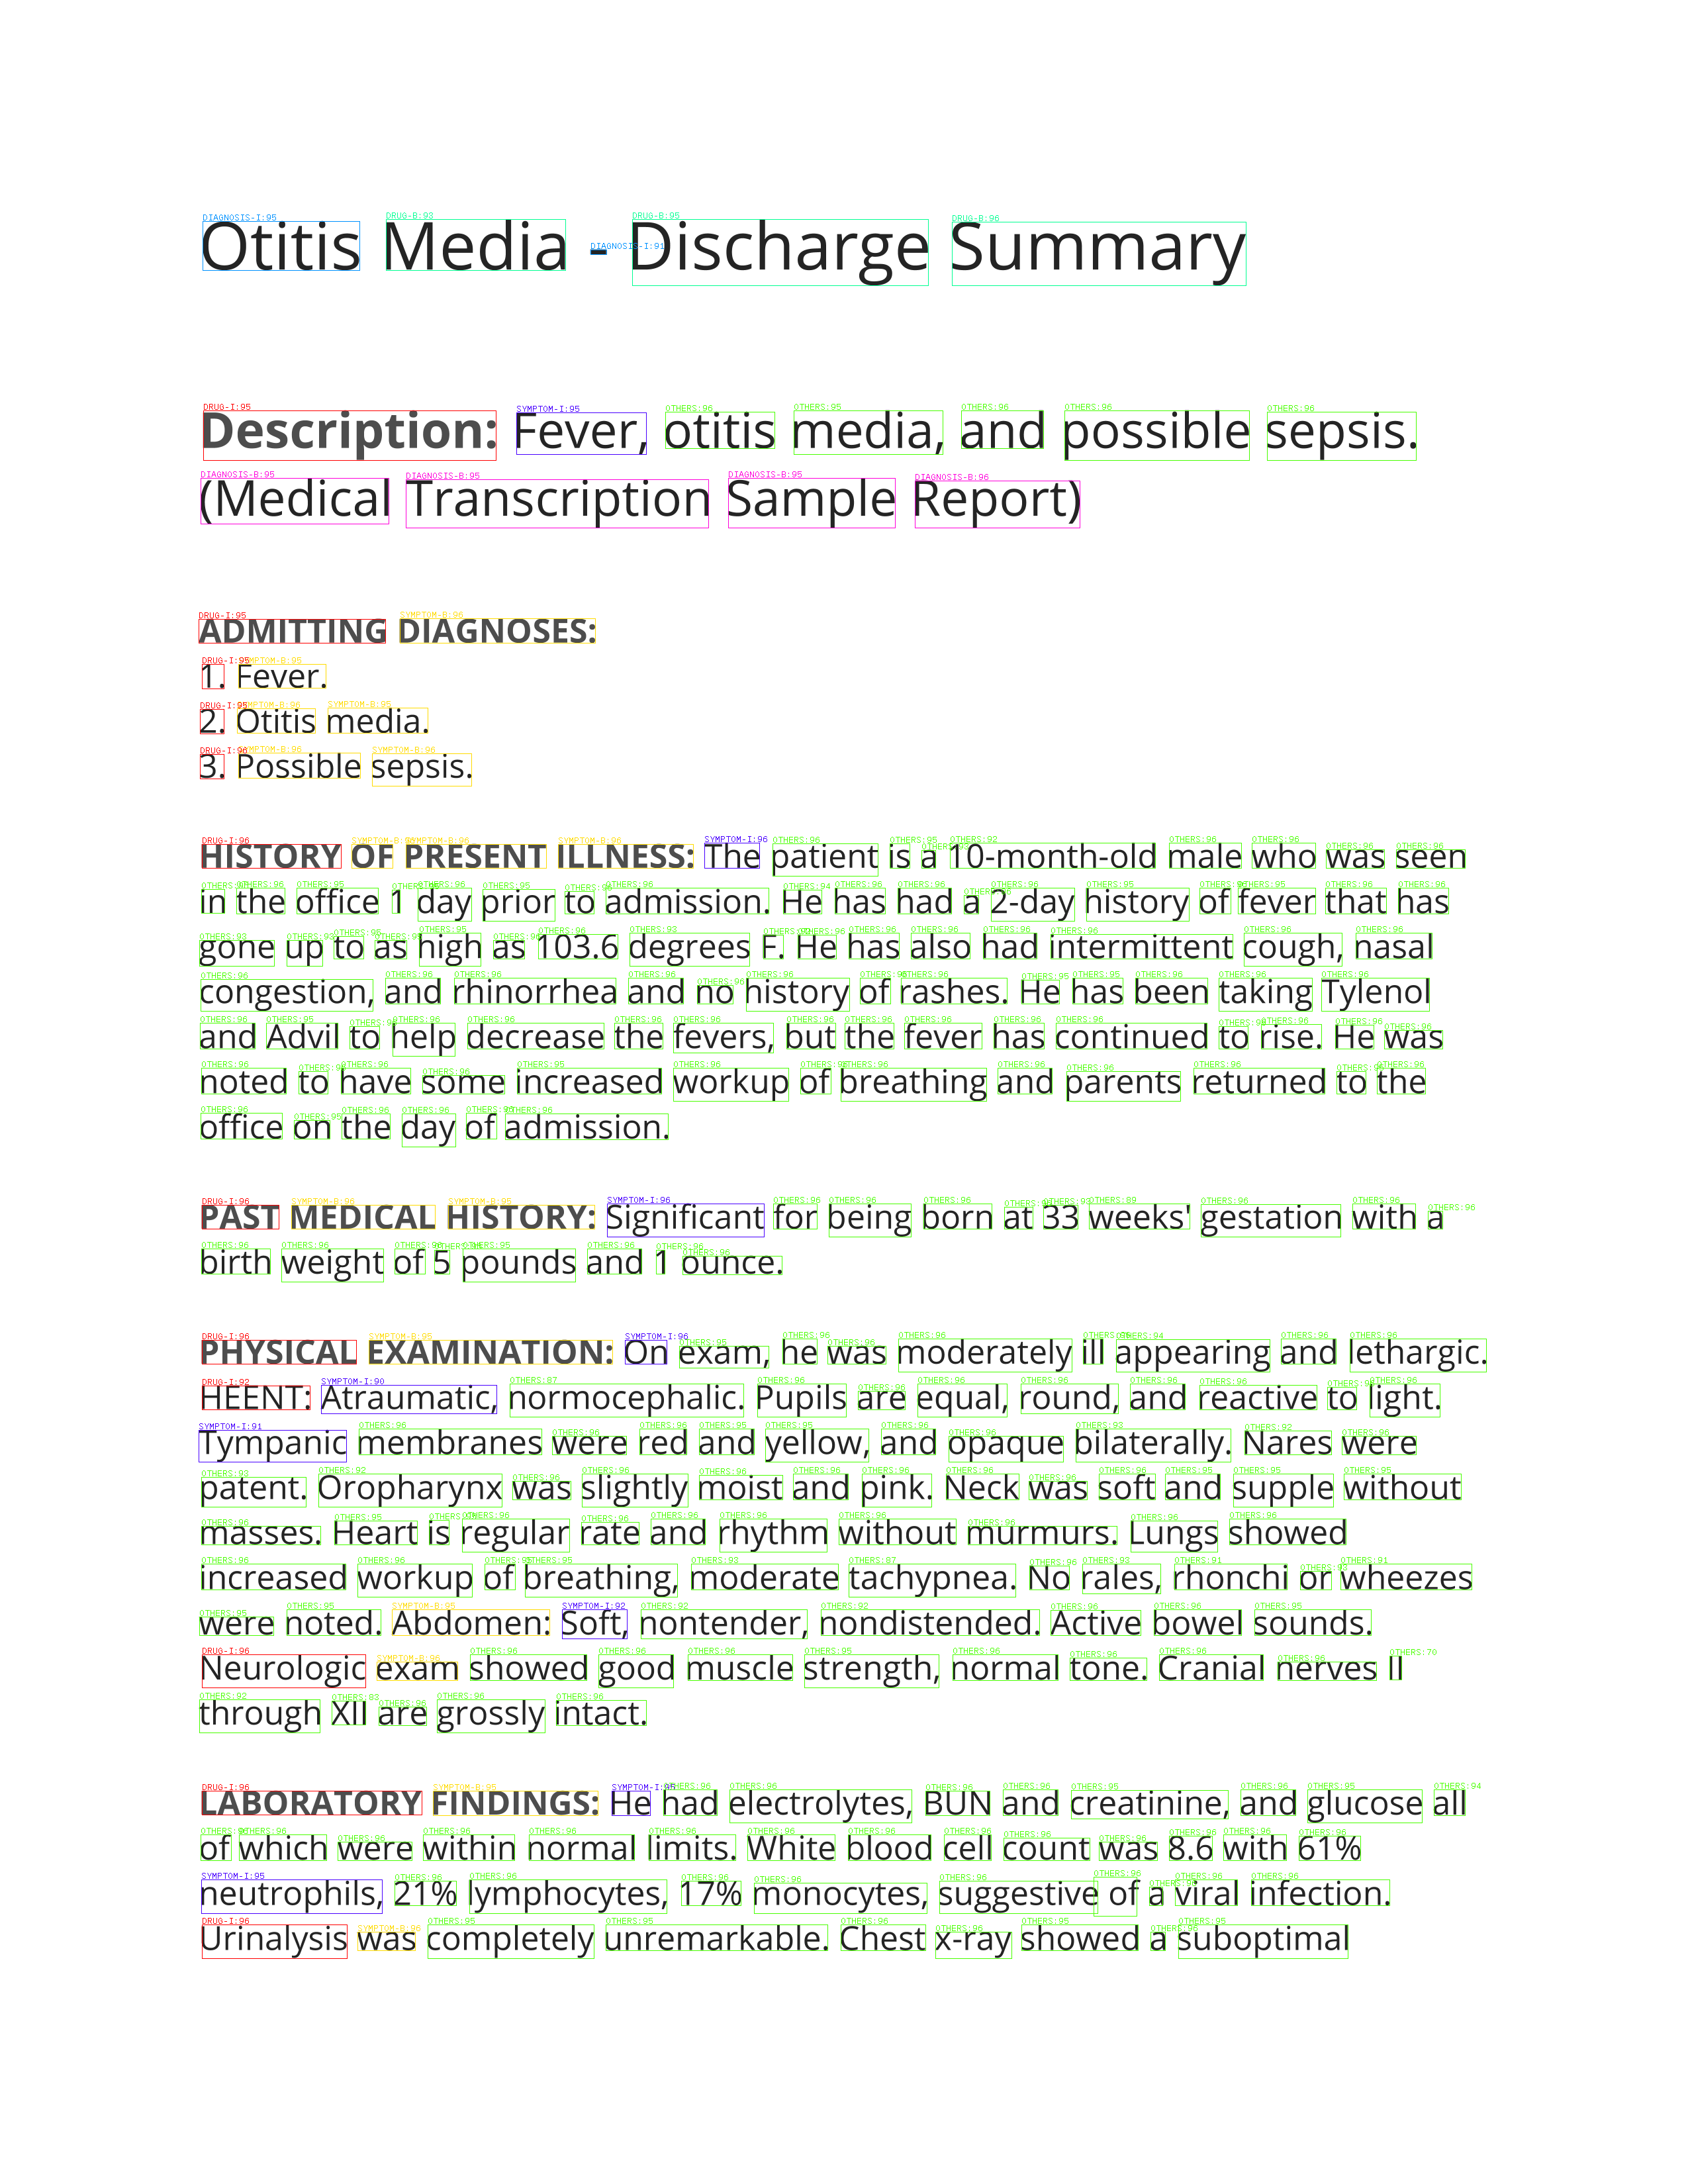

In [ ]:
from sparkocr.utils import display_images_horizontal

from sparkocr.utils import display_images

  
bin_df = spark.read.format("binaryFile").load("./test")
results = pipeline_predict.transform(bin_df)

display_images(results, "image_with_annotations")


## Fit the model

In [ ]:
%%time
ner_fit_model = doc_ner_fine_tuned.fit(pyspark_dataframe)


  0%|          | 0/1 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
100%|██████████| 41/41 [00:31<00:00,  1.28it/s]


CPU times: user 6min 38s, sys: 2min 27s, total: 9min 5s
Wall time: 26min 18s


## Call finetuned model for predict

In [ ]:
pipeline_predict = PipelineModel(stages=[
    binary_to_image,
    img_to_hocr,
    tokenizer,
    ner_fit_model,
    draw_annotations
])

### Post Training Inference


    Image #0:
    Origin: file:/content/test/63-1651494444_0.png
    Resolution: 0 dpi
    Width: 2550 px
    Height: 3299 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


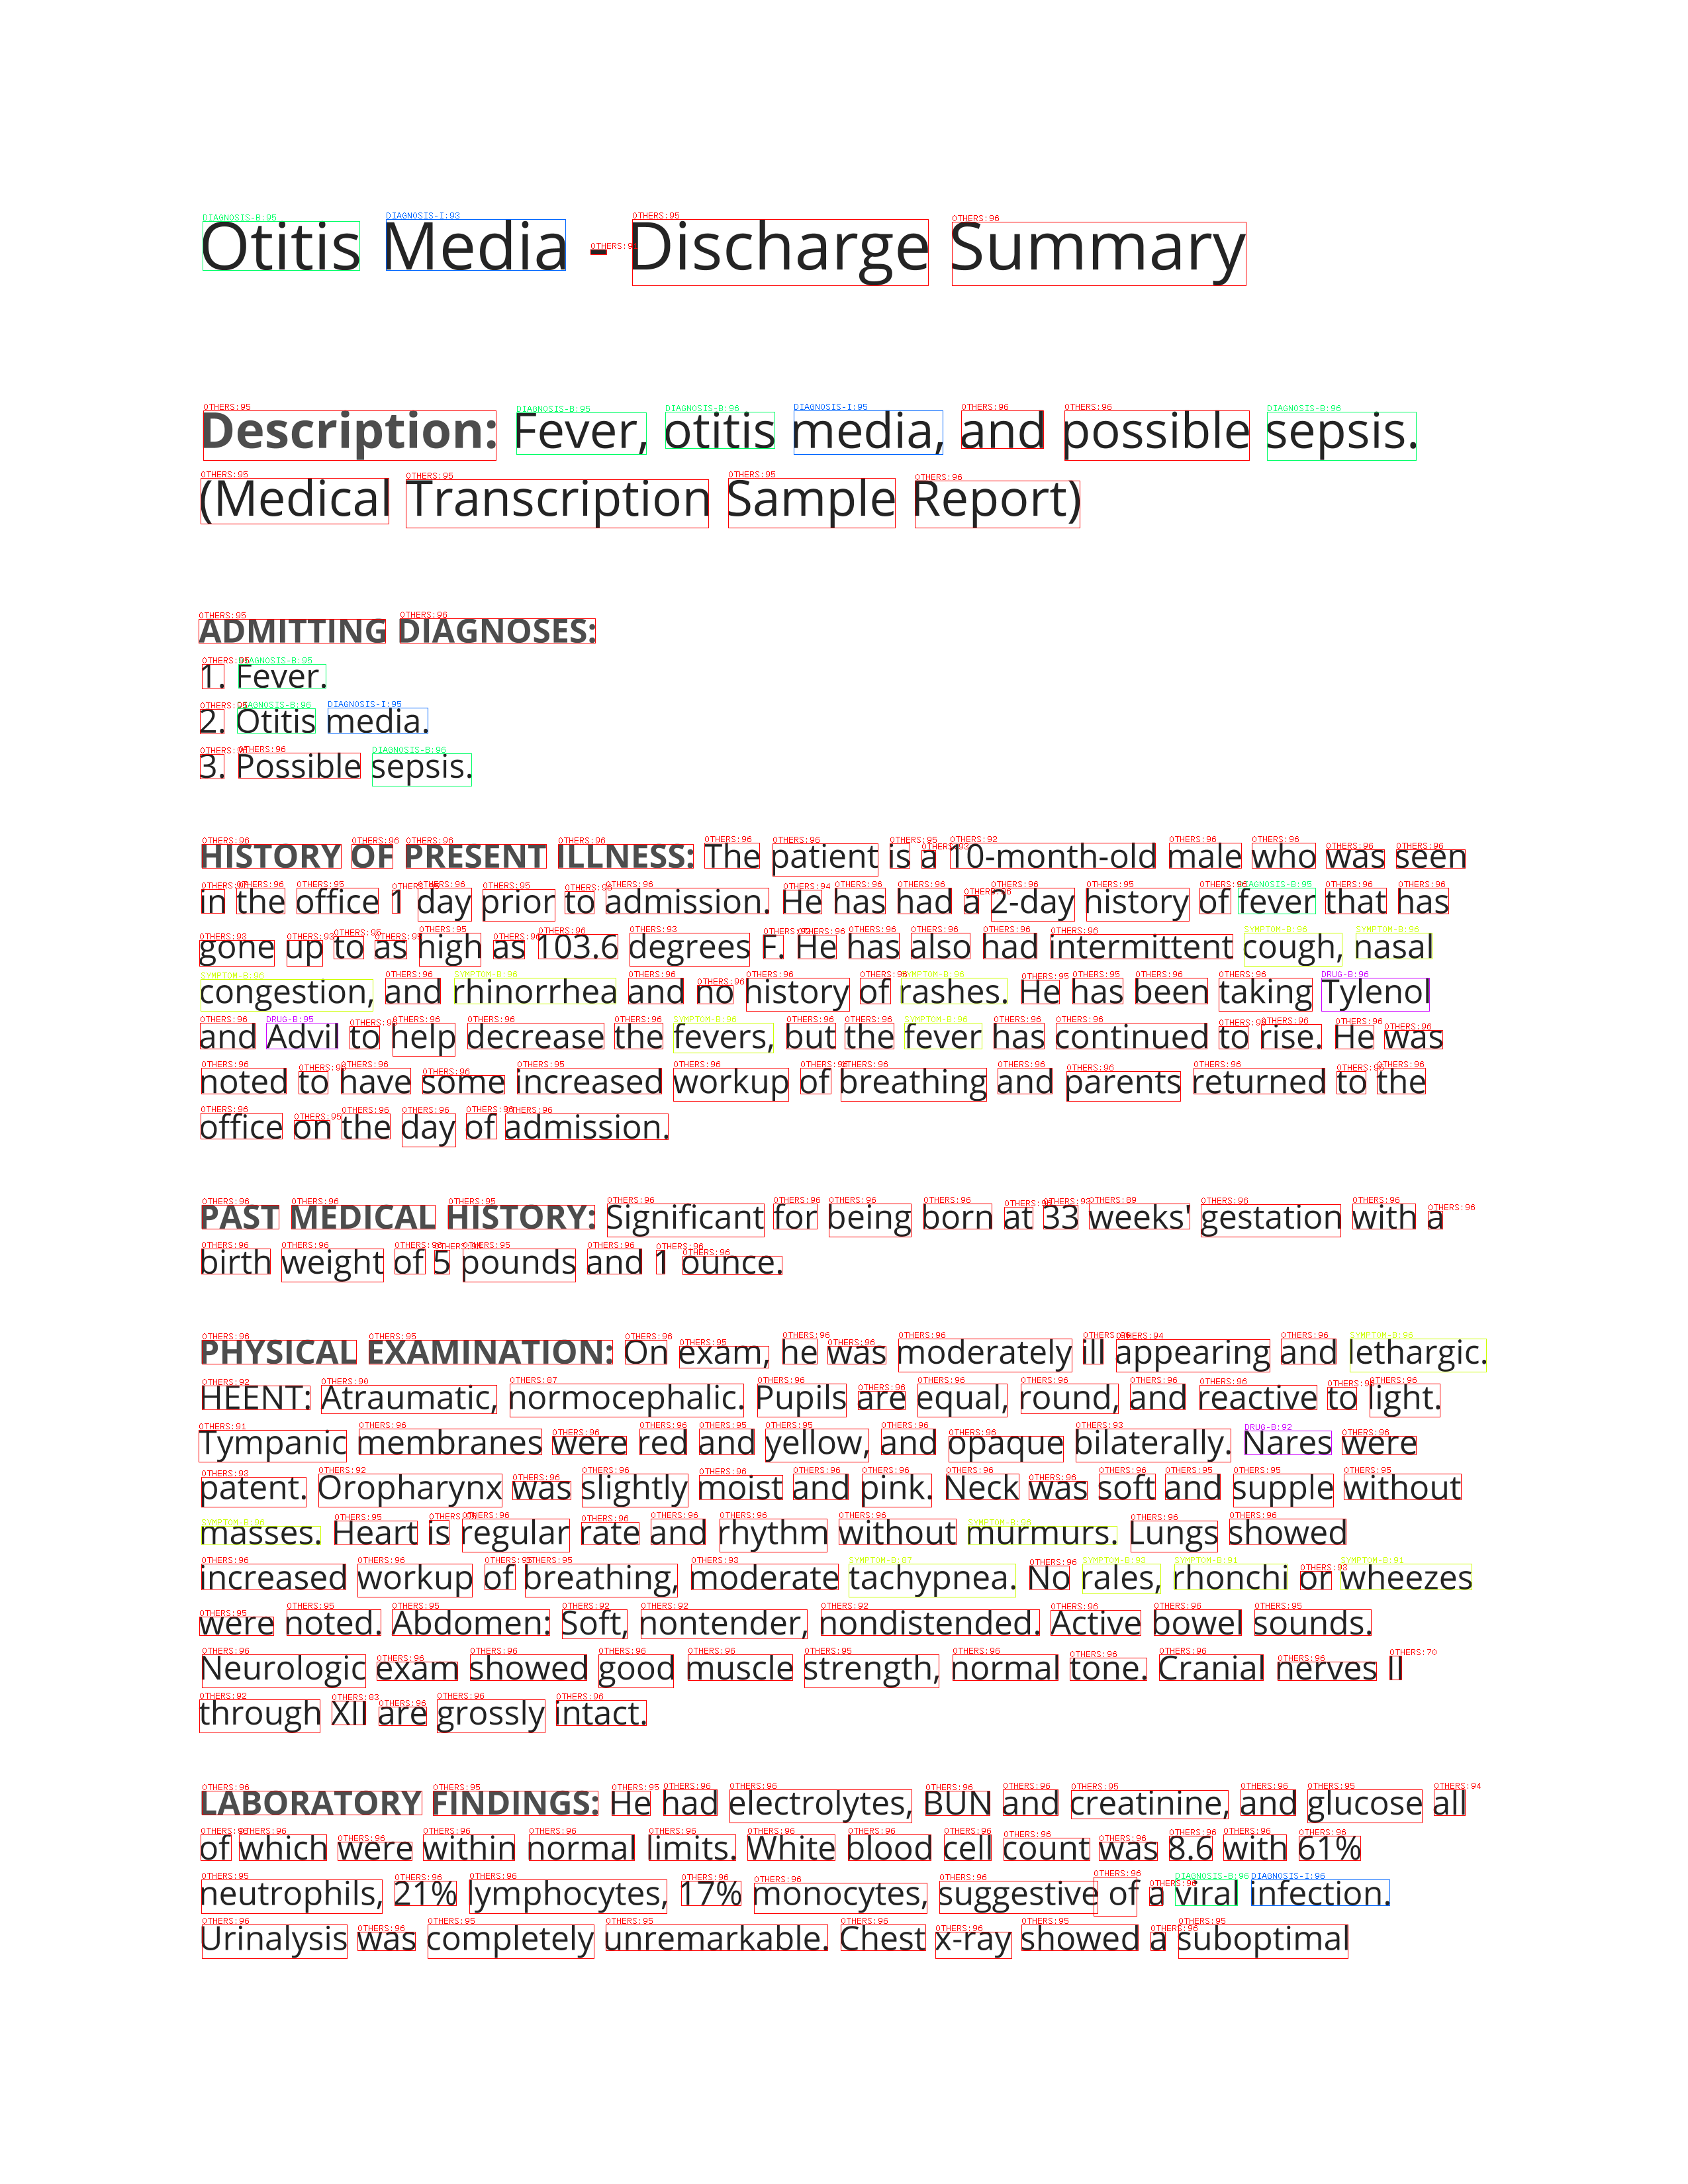

In [ ]:
from sparkocr.utils import display_images_horizontal

from sparkocr.utils import display_images

  
bin_df = spark.read.format("binaryFile").load("/content/test")
bin_df = bin_df
results = pipeline_predict.transform(bin_df)

display_images(results, "image_with_annotations")
